# src

Imports

In [1]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
from numerical.countPeaksAnalysisFunctions import countPeaks, varPeakDistFunction
from numerical.generalFunctions import round_it

from analytical.linear_stability_analysis import detailed_turing_analysis_dict
from randomfunctions import plot_all_dispersion, plot_highest_dispersion

from scipy.signal import find_peaks
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm



Defining run parameters

In [2]:
circuit_n='turinghill'
variant= 0
n_species=2
mechanism='nogrowth'
L=50; x_gridpoints=5; J=L*x_gridpoints;I=J 
T=5000; t_gridpoints = 30; N=T*t_gridpoints #Number of timepoints
filename= lambda parID: '%s_variant%s_%s_ID%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,mechanism,parID,L,J,T,N)
n_param_sets=2000000
lsa_df= pickle.load( open(modellingpath + '/growth/out/analytical/lsa_dataframes/lsa_df_%s_variant%r_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))
single_lsa_df =  lsa_df.xs(0, level=1)
turing_df= pickle.load( open(modellingpath + '/growth/out/analytical/turing/turing_df_%s_variant%r_%rparametersets.pkl'%(circuit_n,variant,n_param_sets), "rb"))

In [3]:
turing_df

,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
118941,0.01,0.01,815.228199,869.092721,12.891932,42.952284,1.698975,184.850592,1.291315,1.388244,9.871792,1.0,2.0,3.0,"[0.3678189590545821, 28.035840015553944]",stable spiral,turing I oscillatory,0.528139+0.000000j,True
130517,0.01,0.01,114.294382,135.519179,31.039472,8.382989,23.895203,0.680626,0.106293,0.098334,8.061394,1.0,2.0,4.0,"[1.9981273546814948, 9.670417490187942]",stable spiral,turing I oscillatory,0.002129+0.000000j,True
135128,0.01,0.01,27.564909,326.25772,1.756841,1.485791,3.631244,58.459388,1.599492,1.819611,8.272982,1.0,2.0,3.0,"[0.2964073513214895, 1.1922446532071926]",stable spiral,turing I oscillatory,0.232466+0.000000j,True
350981,0.01,0.01,239.160455,34.636377,36.233951,64.487235,2.202949,3.850323,0.176898,0.219671,9.765606,1.0,2.0,5.0,"[1.5183433404147844, 50.82511564321475]",stable spiral,turing I oscillatory,0.066225+0.000000j,True
351953,0.01,0.01,54.184841,47.257416,11.605059,33.855143,4.325641,57.999664,0.408074,0.402715,8.87693,1.0,2.0,3.0,"[3.9877276826980332, 53.93669600164983]",stable spiral,turing I oscillatory,0.028128+0.000000j,True
360416,0.01,0.01,385.50889,110.221215,2.483707,0.971105,0.401043,42.103036,5.250474,14.083381,7.772168,1.0,2.0,3.0,"[0.12386347936019793, 0.6822549113494273]",stable point,turing I,0.177010+0.000000j,False
472883,0.01,0.01,290.632742,11.456211,14.439605,0.740754,8.226865,160.623439,3.346537,3.990129,6.62082,1.0,2.0,3.0,"[3.946956059941068, 0.539715295276271]",stable spiral,turing I oscillatory,0.555020+0.000000j,True
486068,0.01,0.01,997.290328,43.111126,155.805279,5.559438,17.475799,0.110001,0.048236,0.080205,7.693766,1.0,2.0,3.0,"[1.3656745565250377, 3.387272620199473]",stable spiral,turing I oscillatory,0.002123+0.000000j,True
546109,0.01,0.01,202.039588,34.495015,3.375462,20.057786,0.44151,37.157037,0.18012,0.141151,5.773969,1.0,2.0,3.0,"[0.5926795355799822, 157.23763183456734]",stable spiral,turing I oscillatory,0.013721+0.000000j,True
742006,0.01,0.01,115.404927,35.75298,2.38433,3.972041,0.222706,2.436736,1.158628,1.275726,5.211853,1.0,2.0,3.0,"[0.06760130262009373, 2.372232733681772]",stable spiral,turing I oscillatory,0.162268+0.000000j,True


In [3]:
filename(1)

'turinghill_variant0_nogrowth_ID1_L50_J250_T5000_N150000'

In [9]:
def plot_highest_dispersion(eigenvalues,crop = 1000, top = 5000, L=100):
    wvn_list = np.array(list(range(0,top+1)))*np.pi/L
    # wvn_list = np.array(list(range(0,5000+1)))*np.pi/100

    plt.plot(wvn_list[:crop], eigenvalues.real[:crop,[-1]], label='Real highest eigenvalue', c='k')
    plt.plot(wvn_list[1:crop], eigenvalues.imag[1:crop,[-1]], linestyle = '--', label = 'Imaginary highest eigenvalue', c='k')

    plt.legend()
    plt.xlabel('Wavenumber')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=0, color='k', linestyle='-', linewidth = 0.1)
    plt.grid()
    plt.tight_layout()


In [6]:
def parID_display(parID, L,J,T,lsa_df,round=False,dispersion_crop=100,surfpattern_crop=T,ss_n=0):
    #data
    U = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Dfinal_%s_ss%s.pkl'%(circuit_n,mechanism,filename(parID), ss_n), 'rb'))

    plot1D(U,round=round)

    plt.subplots(figsize=(10,4))

    #dispersion
    plt.subplot(121)
    parID_dispersion(parID,lsa_df,dispersion_crop,ss_n)
    #convergence
    plt.subplot(122)

    parID_surfpattern(parID,L,J,T,surfpattern_crop,ss_n)
    plt.tight_layout()
    plt.show()
    
def parID_surfpattern(parID,L,J,T,surfpattern_crop,ss_n,record_every_x_hours = 10):
    #data 
    U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s_ss%s.pkl'%(circuit_n,mechanism,filename(parID),ss_n), 'rb'))
    #crop time data
    U_record = [Ux_record[:int(surfpattern_crop/10)] for Ux_record in U_record]
    #grids
    dx = float(L)/float(J-1)
    x_grid = np.array([j*dx for j in range(J)])
    reduced_t_grid = np.arange(0,surfpattern_crop,record_every_x_hours) 

    #plot
    surfpattern(U_record, [x_grid, reduced_t_grid], 'linear',  morphogen=1, rate=0, savefig=False,filename='',logResults=False,normalize=False)


def parID_dispersion(parID,lsa_df,dispersion_crop, ss_n):
    #dispersion
    par_dict = lsa_df.loc[parID].loc[ss_n].to_dict() #converts a dataframe row into a dictionary outputing a dictionary for a specific parameter set
    steadystate = par_dict['ss_list']
    
    print(steadystate)
    out = detailed_turing_analysis_dict(par_dict, circuit_n, n_species,steadystate=steadystate)
    # plot_all_dispersion(out[-3][0],2, crop=dispersion_crop)
    plot_highest_dispersion(out[-3][0],crop = dispersion_crop, top = 5000, L=100)

# Output

## Turing I hopf

Patterning

202171 0
turing I hopf


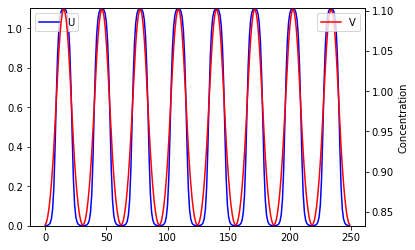

[0.69511427 1.10193741]


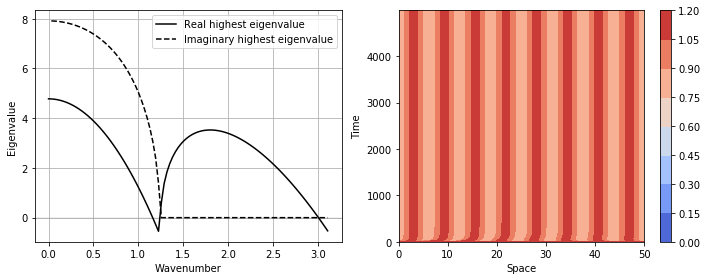

------------
202171 1
simple stable


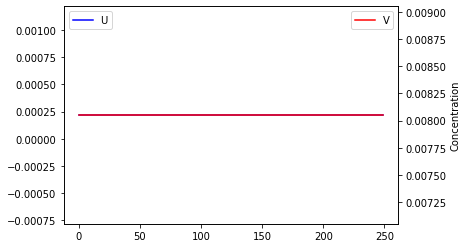

[0.00021756 0.00802479]


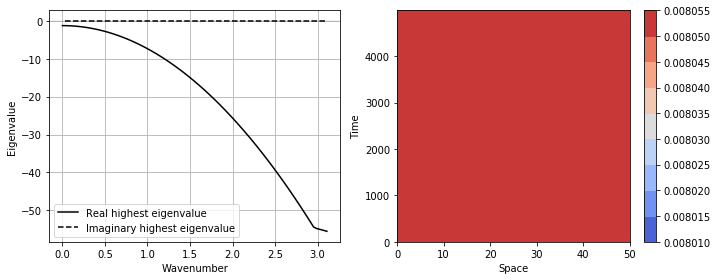

------------
202171 2
simple unstable


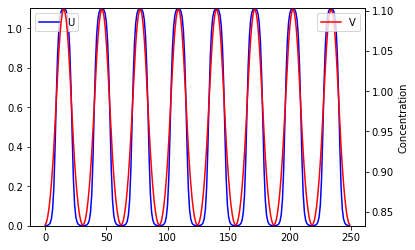

[0.26768038 0.17121294]


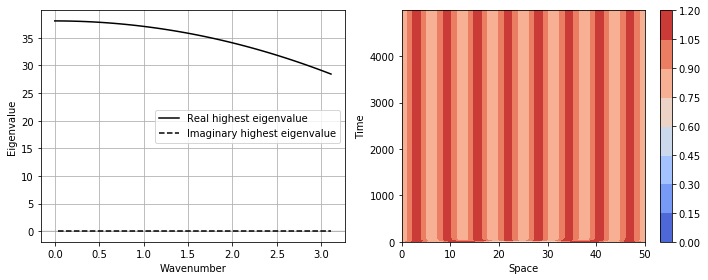

------------


,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
0,0.01,0.01,148.99358,199.502396,0.883501,1.244981,8.394179,4.884652,45.966864,1.242121,6.096602,1.0,2.0,3.0,"[0.6951142744193266, 1.1019374084373064]",unstable spiral,turing I hopf,4.778571+7.914123j,True
1,0.01,0.01,148.99358,199.502396,0.883501,1.244981,8.394179,4.884652,45.966864,1.242121,6.096602,1.0,2.0,3.0,"[0.00021755917354251714, 0.008024787573432945]",stable point,simple stable,-1.242121+0.000000j,False
2,0.01,0.01,148.99358,199.502396,0.883501,1.244981,8.394179,4.884652,45.966864,1.242121,6.096602,1.0,2.0,3.0,"[0.2676803830599188, 0.17121294161381814]",unstable point,simple unstable,38.066326+0.000000j,False


In [77]:
parID = 202171
ss_n = int(lsa_df.loc[parID].loc[0]['ss_n'])
for ss_n in range(ss_n):
    print(parID, ss_n)
    print(lsa_df.loc[parID].loc[ss_n]['system_class'])
    parID_display(parID, L,J,T,lsa_df,dispersion_crop=100,ss_n=ss_n)
    print('------------')
lsa_df.loc[parID]

Ephemeral patterning

51090 0
turing I hopf


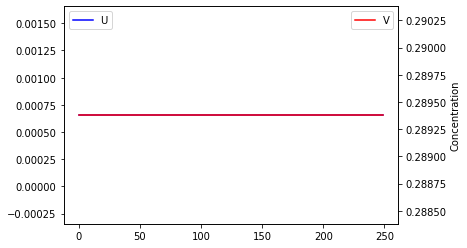

[  3.77039121 114.88124443]


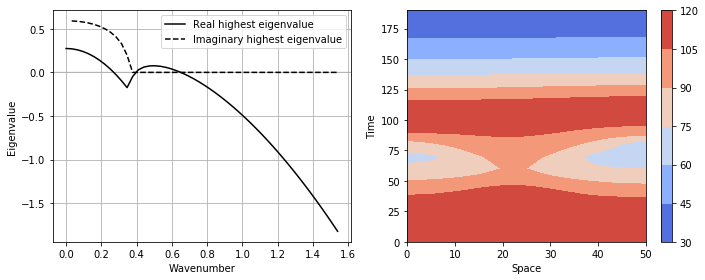

------------
51090 1
simple stable


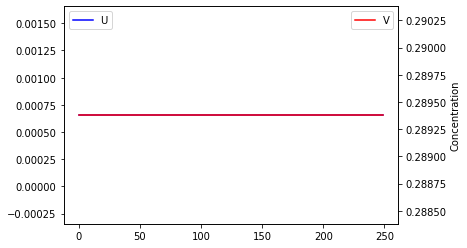

[0.00065583 0.28937933]


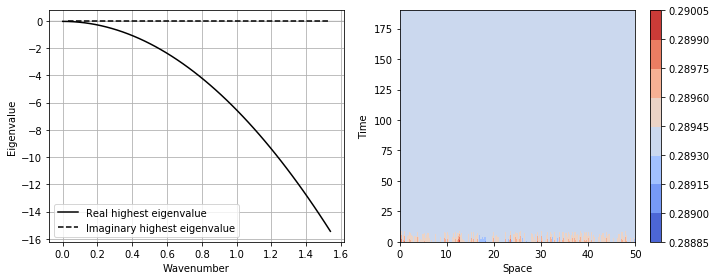

------------
51090 2
simple unstable


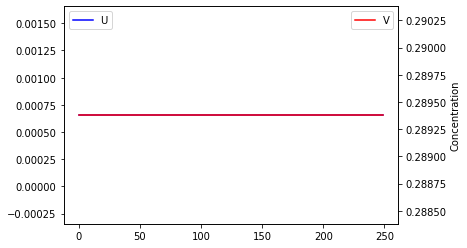

[ 1.51571038 27.81304108]


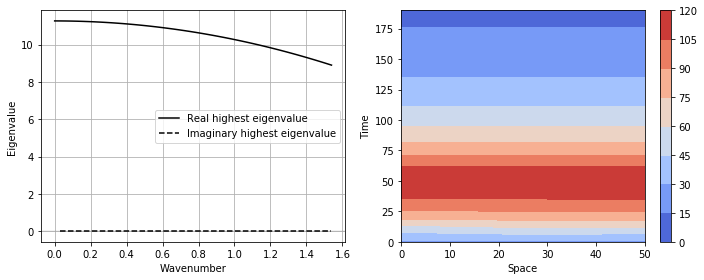

------------


,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
0,0.01,0.01,183.059943,10.147816,3.917845,157.722584,4.713114,1.76598,15.255625,0.034557,6.503138,1.0,2.0,3.0,"[3.770391213629635, 114.88124443143585]",unstable spiral,turing I hopf,0.273827+0.591119j,True
1,0.01,0.01,183.059943,10.147816,3.917845,157.722584,4.713114,1.76598,15.255625,0.034557,6.503138,1.0,2.0,3.0,"[0.0006558265125788919, 0.2893793331599248]",stable point,simple stable,-0.034557+0.000000j,False
2,0.01,0.01,183.059943,10.147816,3.917845,157.722584,4.713114,1.76598,15.255625,0.034557,6.503138,1.0,2.0,3.0,"[1.5157103800188014, 27.813041084296398]",unstable point,simple unstable,11.266964+0.000000j,False


In [79]:
parID = 51090
ss_n = int(lsa_df.loc[parID].loc[0]['ss_n'])
for ss_n in range(ss_n):
    print(parID, ss_n)
    print(lsa_df.loc[parID].loc[ss_n]['system_class'])
    parID_display(parID, L,J,T,lsa_df,dispersion_crop=50,surfpattern_crop=200,ss_n=ss_n)
    print('------------')
lsa_df.loc[parID]

## Turing I

Patterning

1133916 0
turing I oscillatory


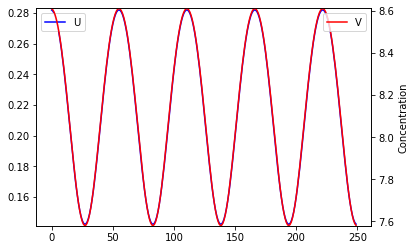

[0.20345611 8.01213494]


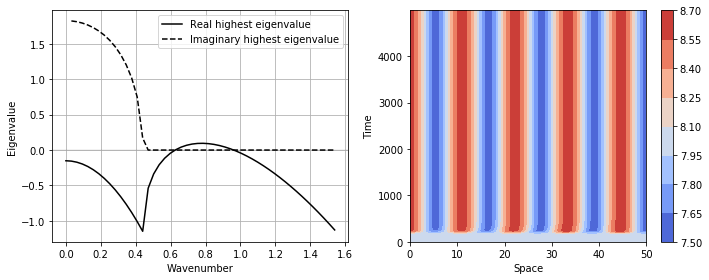

------------
1133916 1
simple stable


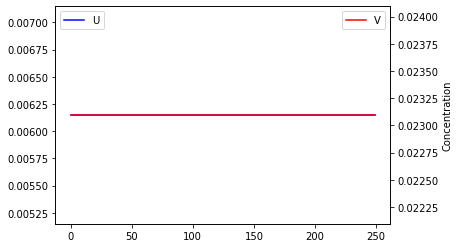

[0.00613969 0.02301842]


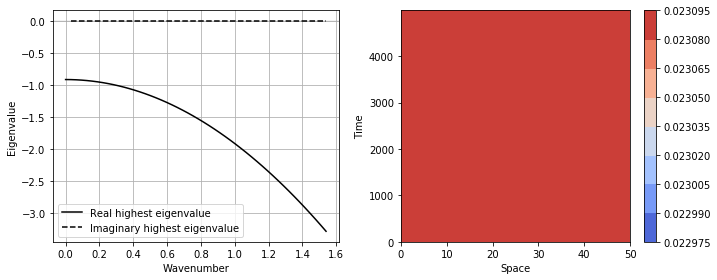

------------
1133916 2
simple unstable


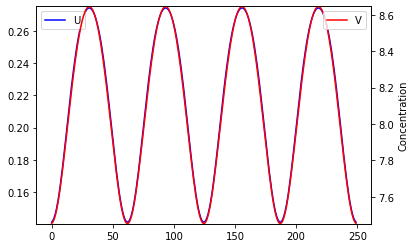

[0.01406135 0.09696334]


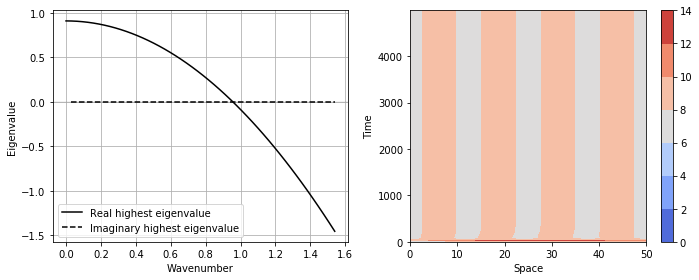

------------


,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
0,0.01,0.01,25.280346,24.820603,0.46665,2.894328,0.1715,22.588552,2.340128,1.812301,9.296574,1.0,2.0,3.0,"[0.2034561068203429, 8.012134944940739]",stable spiral,turing I oscillatory,0.095140+0.000000j,True
1,0.01,0.01,25.280346,24.820603,0.46665,2.894328,0.1715,22.588552,2.340128,1.812301,9.296574,1.0,2.0,3.0,"[0.006139694570254604, 0.023018424140248274]",stable point,simple stable,-0.915458+0.000000j,False
2,0.01,0.01,25.280346,24.820603,0.46665,2.894328,0.1715,22.588552,2.340128,1.812301,9.296574,1.0,2.0,3.0,"[0.014061349949625924, 0.09696333860111149]",unstable point,simple unstable,0.910545+0.000000j,False


In [11]:
parID = 1133916
ss_n = int(lsa_df.loc[parID].loc[0]['ss_n'])
for ss_n in range(ss_n):
    print(parID, ss_n)
    print(lsa_df.loc[parID].loc[ss_n]['system_class'])
    parID_display(parID, L,J,T,lsa_df,dispersion_crop=50,ss_n=ss_n)
    print('------------')
lsa_df.loc[parID]

In [7]:
turing_df.index

Int64Index([ 118941,  130517,  135128,  350981,  351953,  360416,  472883,
             486068,  546109,  742006,  862004, 1121752, 1133916, 1195022,
            1251569, 1271426, 1282460, 1363184, 1365378, 1511110, 1591223,
            1690913, 1695603, 1706579, 1710204, 1808247, 1809921, 1814923,
            1826994, 1869288, 1874504],
           dtype='int64')

1271426 0
simple stable


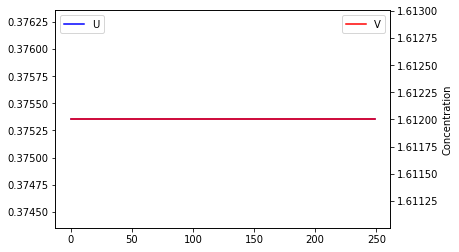

[0.36685065 1.60625362]


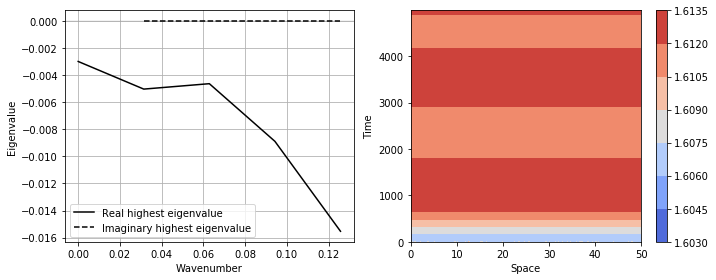

------------
1271426 1
simple stable


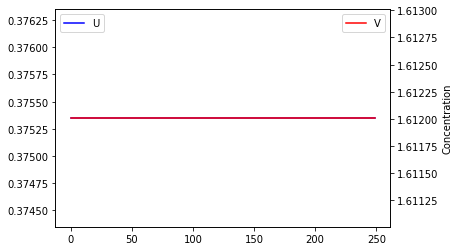

[0.37349705 1.61071511]


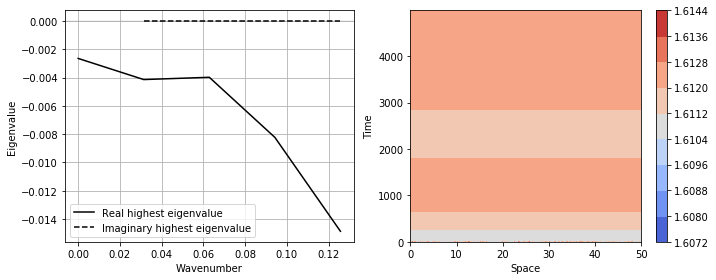

------------
1271426 2
simple stable


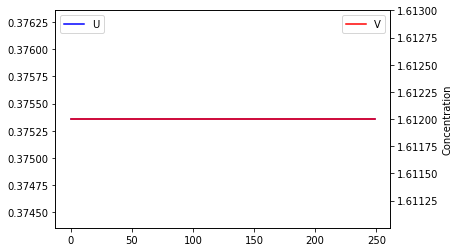

[0.36272328 1.60357743]


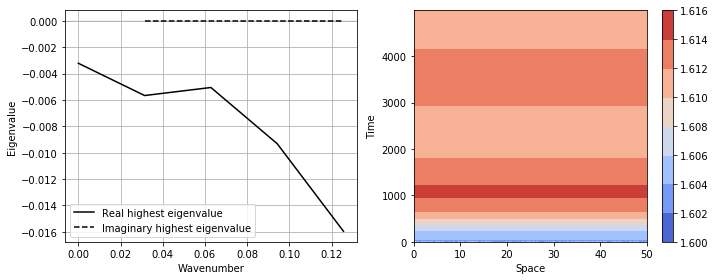

------------
1271426 3
simple stable


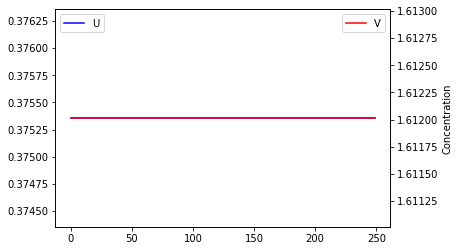

[0.38047556 1.61225334]


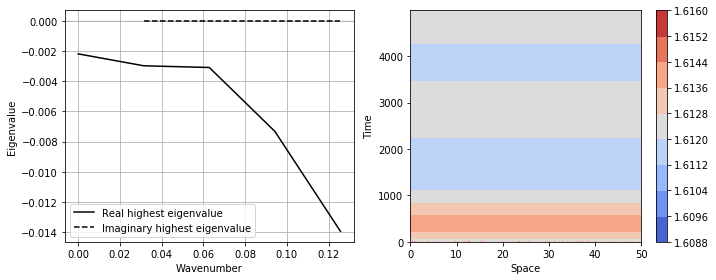

------------
1271426 4
turing I oscillatory


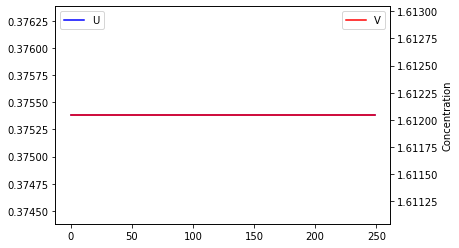

[0.41344634 1.62368288]


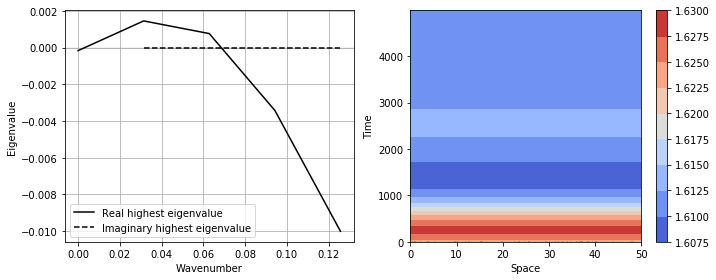

------------
1271426 5
simple stable


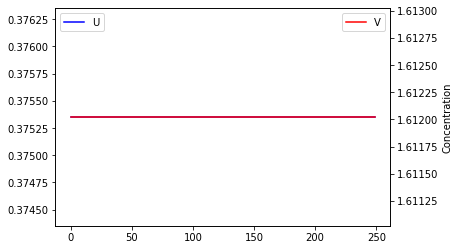

[0.39076187 1.6186448 ]


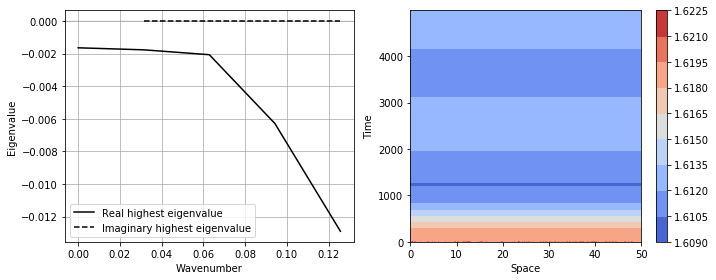

------------


,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
0,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.3668506453478424, 1.606253622411128]",stable spiral,simple stable,-0.002994+0.005580j,True
1,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.37349704656955873, 1.6107151065570158]",stable spiral,simple stable,-0.002650+0.005531j,True
2,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.3627232799329084, 1.6035774335382431]",stable spiral,simple stable,-0.003213+0.005605j,True
3,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.38047555950293915, 1.6122533362563432]",stable spiral,simple stable,-0.002185+0.005402j,True
4,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.4134463429492179, 1.62368287660001]",stable spiral,turing I oscillatory,0.001451+0.000000j,True
5,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.3907618664457624, 1.6186448012243044]",stable spiral,simple stable,-0.001648+0.005252j,True


In [16]:
parID=1271426
ss_n = int(lsa_df.loc[parID].loc[0]['ss_n'])
for ss_n in range(ss_n):
    print(parID, ss_n)
    print(lsa_df.loc[parID].loc[ss_n]['system_class'])
    parID_display(parID, L,J,T,lsa_df,dispersion_crop=5,surfpattern_crop=T,ss_n=ss_n)
    
    print('------------')
lsa_df.loc[parID]

Ephemeral Patterning

350981 0
simple unstable


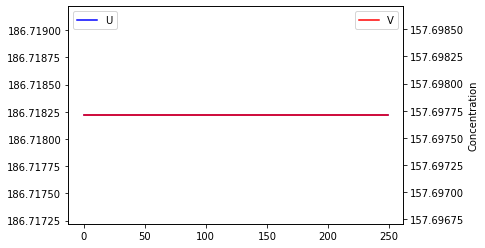

[ 1.31803826 41.60970277]


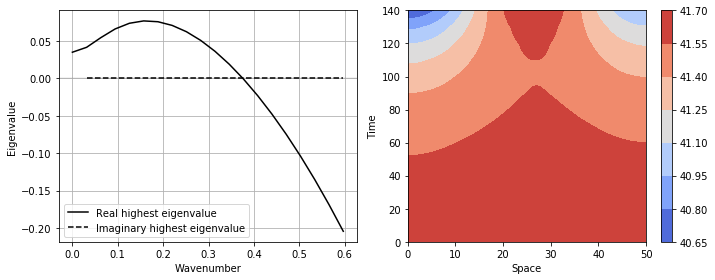

------------
350981 1
simple stable


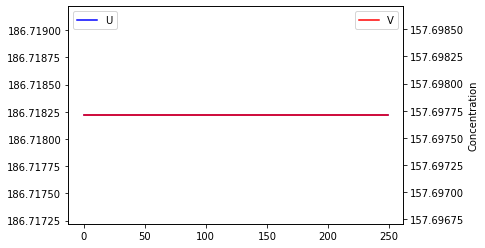

[186.71822025 157.69770977]


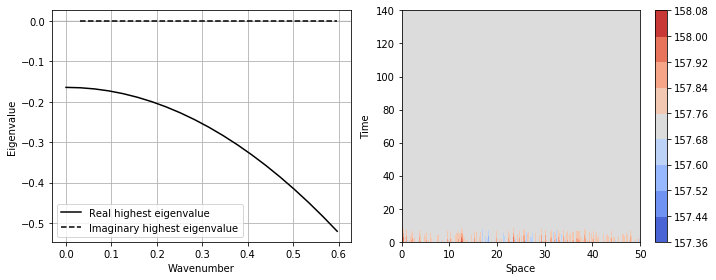

------------
350981 2
simple stable


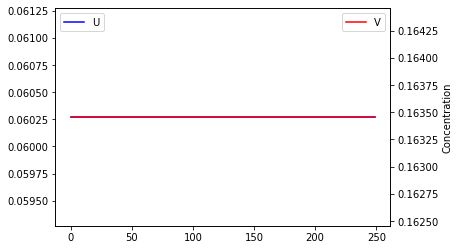

[0.0602702  0.16345027]


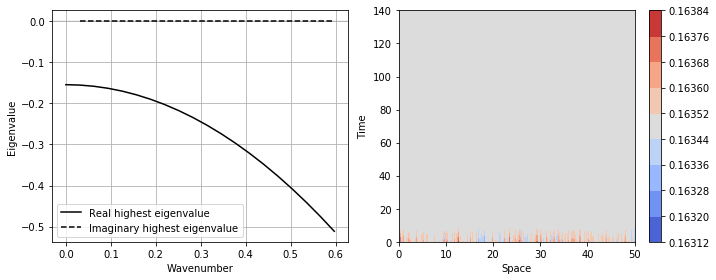

------------
350981 3
simple unstable


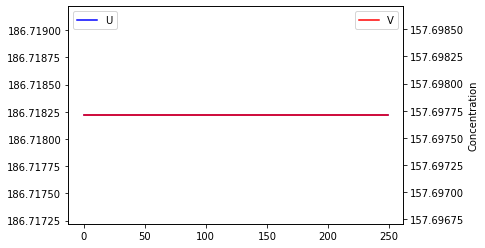

[  5.19112903 133.65767947]


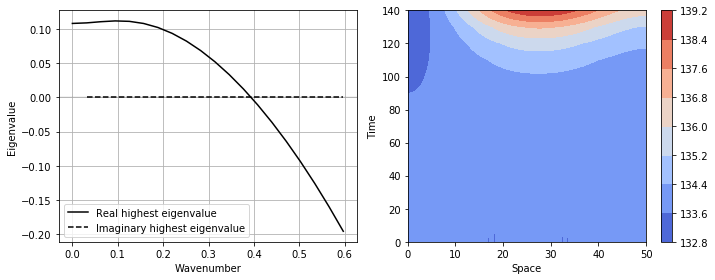

------------
350981 4
turing I oscillatory


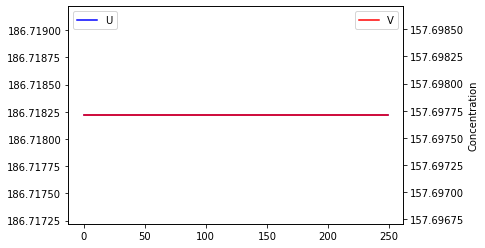

[ 1.51834334 50.82511564]


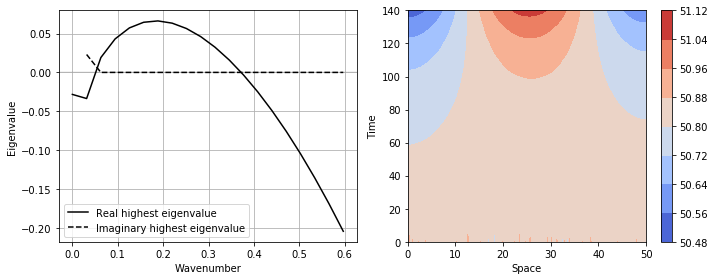

------------


,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
0,0.01,0.01,239.160455,34.636377,36.233951,64.487235,2.202949,3.850323,0.176898,0.219671,9.765606,1.0,2.0,5.0,"[1.31803825820293, 41.6097027668303]",unstable point,simple unstable,0.076712+0.000000j,False
1,0.01,0.01,239.160455,34.636377,36.233951,64.487235,2.202949,3.850323,0.176898,0.219671,9.765606,1.0,2.0,5.0,"[186.7182202539359, 157.6977097667872]",stable point,simple stable,-0.164397+0.000000j,False
2,0.01,0.01,239.160455,34.636377,36.233951,64.487235,2.202949,3.850323,0.176898,0.219671,9.765606,1.0,2.0,5.0,"[0.0602701974124618, 0.16345026909005436]",stable point,simple stable,-0.154941+0.000000j,False
3,0.01,0.01,239.160455,34.636377,36.233951,64.487235,2.202949,3.850323,0.176898,0.219671,9.765606,1.0,2.0,5.0,"[5.191129027033817, 133.65767947133511]",unstable point,simple unstable,0.111612+0.000000j,False
4,0.01,0.01,239.160455,34.636377,36.233951,64.487235,2.202949,3.850323,0.176898,0.219671,9.765606,1.0,2.0,5.0,"[1.5183433404147844, 50.82511564321475]",stable spiral,turing I oscillatory,0.066225+0.000000j,True


In [66]:
parID = 350981
ss_n = int(lsa_df.loc[parID].loc[0]['ss_n'])
for ss_n in range(ss_n):
    print(parID, ss_n)
    print(lsa_df.loc[parID].loc[ss_n]['system_class'])
    parID_display(parID, L,J,T,lsa_df,dispersion_crop=20,surfpattern_crop=150,ss_n=ss_n)
    print('------------')
lsa_df.loc[parID]


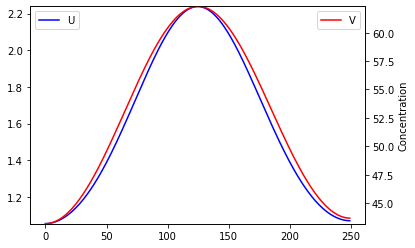

(2, 250)

In [67]:
ss_n=4
U_record = pickle.load( open(modellingpath + '/growth/out/numerical/%s/%s/data/2Drecord_%s_ss%s.pkl'%(circuit_n,mechanism,filename(parID),ss_n), 'rb'))
U = [Ux[25] for Ux in U_record]
plot1D(U)
np.shape(U)

Different pattern

118941 0


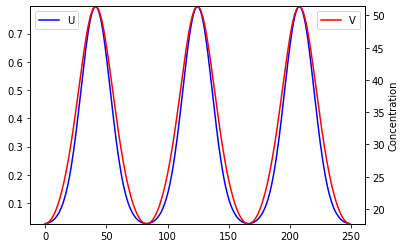

[ 0.36781896 28.03584002]


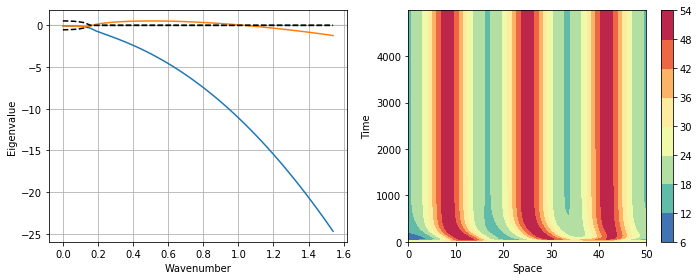

------------
118941 1


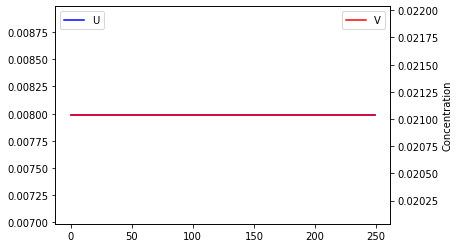

[0.00798607 0.02101894]


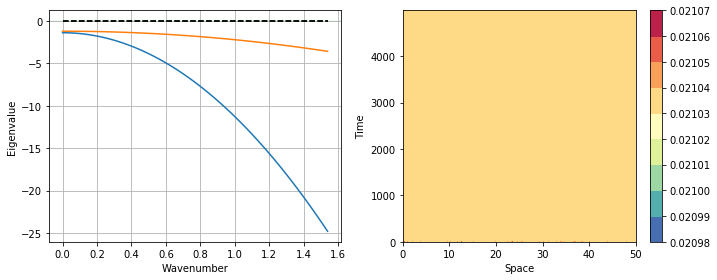

------------
118941 2


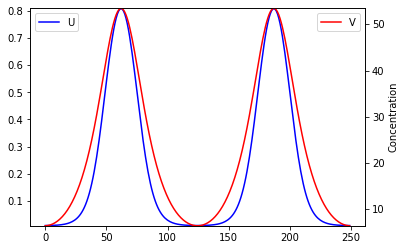

[ 0.32670035 22.33039089]


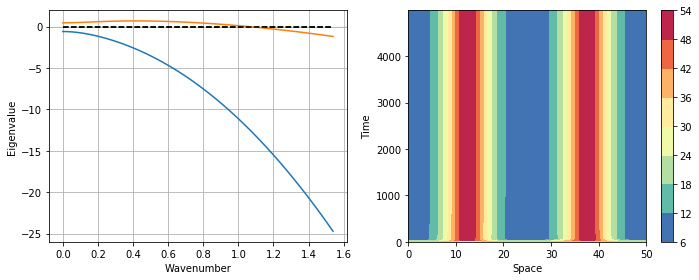

------------


,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
0,0.01,0.01,815.228199,869.092721,12.891932,42.952284,1.698975,184.850592,1.291315,1.388244,9.871792,1.0,2.0,3.0,"[0.3678189590545821, 28.035840015553944]",stable spiral,turing I oscillatory,0.528139+0.000000j,True
1,0.01,0.01,815.228199,869.092721,12.891932,42.952284,1.698975,184.850592,1.291315,1.388244,9.871792,1.0,2.0,3.0,"[0.007986066666272657, 0.021018942011715835]",stable point,simple stable,-1.212971+0.000000j,False
2,0.01,0.01,815.228199,869.092721,12.891932,42.952284,1.698975,184.850592,1.291315,1.388244,9.871792,1.0,2.0,3.0,"[0.32670034897218414, 22.33039088517898]",unstable point,simple unstable,0.674556+0.000000j,False


In [8]:
parID = 118941
for ss_n in range(3):
    print(parID, ss_n)
    parID_display(parID, L,J,T,lsa_df,crop=50,ss_n=ss_n)
    print('------------')
lsa_df.loc[parID]

No pattern


1271426 0
simple stable


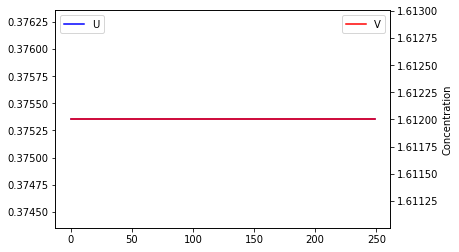

[0.36685065 1.60625362]


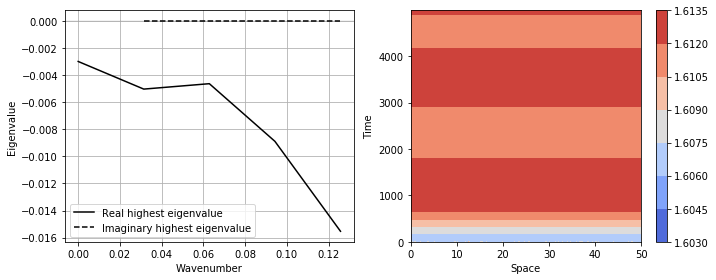

------------
1271426 1
simple stable


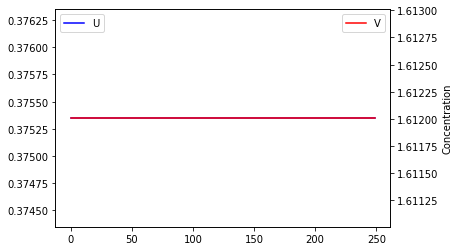

[0.37349705 1.61071511]


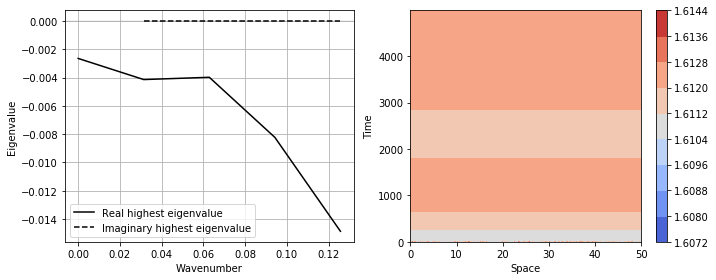

------------
1271426 2
simple stable


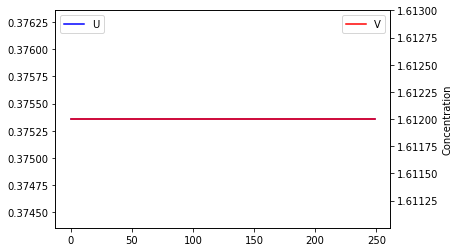

[0.36272328 1.60357743]


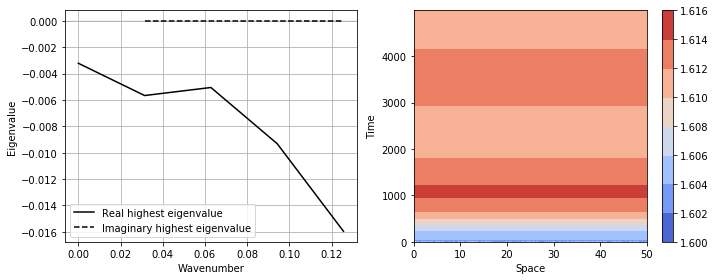

------------
1271426 3
simple stable


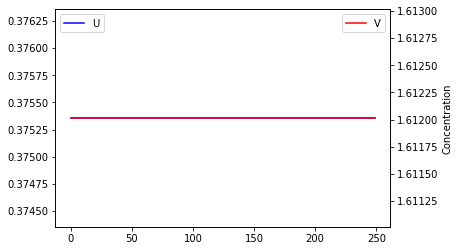

[0.38047556 1.61225334]


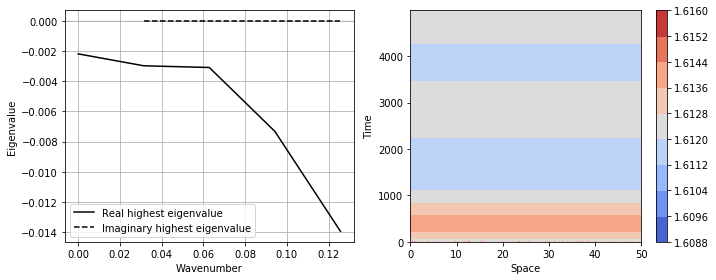

------------
1271426 4
turing I oscillatory


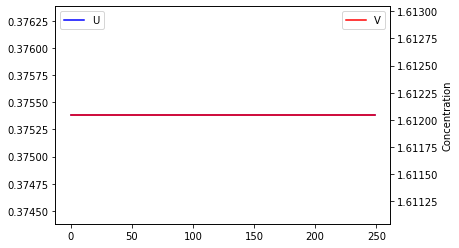

[0.41344634 1.62368288]


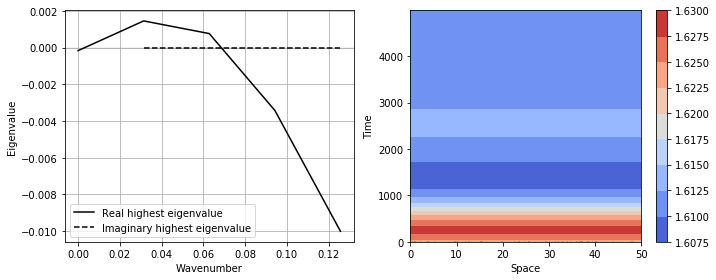

------------
1271426 5
simple stable


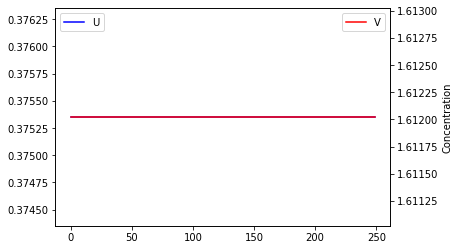

[0.39076187 1.6186448 ]


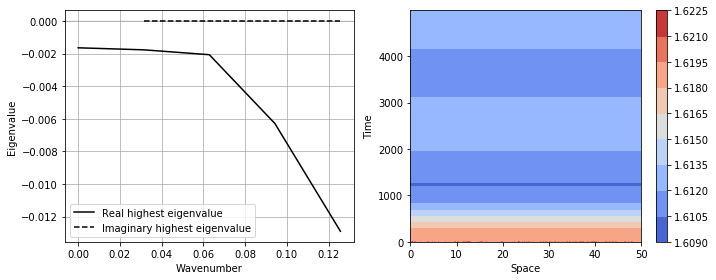

------------


,ba,bb,Va,Vb,kaa,kba,kab,kbb,mua,mub,d_B,d_A,n,ss_n,ss_list,ss_class,system_class,maxeig,complex_dispersion
0,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.3668506453478424, 1.606253622411128]",stable spiral,simple stable,-0.002994+0.005580j,True
1,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.37349704656955873, 1.6107151065570158]",stable spiral,simple stable,-0.002650+0.005531j,True
2,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.3627232799329084, 1.6035774335382431]",stable spiral,simple stable,-0.003213+0.005605j,True
3,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.38047555950293915, 1.6122533362563432]",stable spiral,simple stable,-0.002185+0.005402j,True
4,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.4134463429492179, 1.62368287660001]",stable spiral,turing I oscillatory,0.001451+0.000000j,True
5,0.01,0.01,190.225628,293.574451,6.800965,0.220735,246.462242,0.352554,0.054968,0.006626,7.974703,1.0,2.0,6.0,"[0.3907618664457624, 1.6186448012243044]",stable spiral,simple stable,-0.001648+0.005252j,True


In [17]:
parID=1271426
ss_n = int(lsa_df.loc[parID].loc[0]['ss_n'])
for ss_n in range(ss_n):
    print(parID, ss_n)
    print(lsa_df.loc[parID].loc[ss_n]['system_class'])
    parID_display(parID, L,J,T,lsa_df,dispersion_crop=5,surfpattern_crop=T,ss_n=ss_n)
    
    print('------------')
lsa_df.loc[parID]